In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
class CubikRubic3x3Engine:
    front = np.zeros((3, 3), dtype=int)
    back = np.zeros((3, 3), dtype=int)
    right = np.zeros((3, 3), dtype=int)
    left = np.zeros((3, 3), dtype=int)
    top = np.zeros((3, 3), dtype=int)
    down = np.zeros((3, 3), dtype=int)

    edges = ['left', 'front', 'right', 'back', 'top', 'down']

    color_mapping = {
        0 : (250, 250, 250), # white
        1 : (0, 200, 0),     # green
        2 : (200, 0, 0),     # red
        3 : (240, 120, 0),   # orange
        4 : (0, 0, 200),     # blue
        5 : (240, 220, 0),   # yellow
    }

    char2idx = {
        "w" : 0,
        "g" : 1,
        "r" : 2,
        "o" : 3,
        "b" : 4,
        "y" : 5,
    }

    def _fill_edge(self, edge, iterable):
        for i in range(3):
            for j in range(3):
                edge[i, j] = next(iterable)

    def __init__(self, state=None):
        if state is None:
            raw_state = iter(np.random.permutation([i for i in range(6) for j in range(9)]))
            for edge in self.edges:
                self._fill_edge(self.__getattribute__(edge), raw_state)
        else:
            for edge, value in state.items():
                raw_state = iter([self.char2idx[c] for c in value])
                self._fill_edge(self.__getattribute__(edge), raw_state)

    def _rotare_edge_full(self, edge='top', r=False):
        c_edge = self.__getattribute__(edge)
        cycle = [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (1, 0)]
        if r:
            cycle = list(reversed(cycle))
        cycle *= 2
        tmp1 = c_edge[cycle[0]]
        tmp2 = c_edge[cycle[1]]
        for i in range(8):
            c_edge[cycle[i]] = c_edge[cycle[i+2]]
        c_edge[cycle[-2]] = tmp1
        c_edge[cycle[-1]] = tmp2

    def _rotare_left(self):
        self._rotare_edge_full(edge='top', r=True)
        self._rotare_edge_full(edge='down', r=False)

        tmp = np.copy(self.front)
        self.front = np.copy(self.right)
        self.right = np.copy(self.back)
        self.back = np.copy(self.left)
        self.left = tmp

    def _rotare_right(self):
        self._rotare_edge_full(edge='top', r=False)
        self._rotare_edge_full(edge='down', r=True)

        tmp = np.copy(self.front)
        self.front = np.copy(self.left)
        self.left = np.copy(self.back)
        self.back = np.copy(self.right)
        self.right = tmp

    def _rotare_up(self):
        self._rotare_edge_full(edge='right', r=True)
        self._rotare_edge_full(edge='left', r=False)

        tmp = np.copy(self.front)
        self.front = np.copy(self.down)
        self.down = np.copy(self.back)
        self.back = np.copy(self.top[::-1])
        self.top = tmp

    def _rotare_down(self):
        self._rotare_edge_full(edge='right', r=False)
        self._rotare_edge_full(edge='left', r=True)

        tmp = np.copy(self.front)
        self.front = np.copy(self.top)
        self.top = np.copy(self.back[::-1, ::-1])
        self.back = np.copy(self.down[::-1, ::-1])
        self.down = tmp

    def _up(self, r=False):
        if r:
            self._rotare_edge_full(edge='top', r=False)
            tmp = np.copy(self.front[0])
            self.front[0] = np.copy(self.left[0])
            self.left[0] = np.copy(self.back[0])
            self.back[0] = np.copy(self.right[0])
            self.right[0] = tmp
        else:
            self._rotare_edge_full(edge='top', r=True)
            tmp = np.copy(self.front[0])
            self.front[0] = np.copy(self.right[0])
            self.right[0] = np.copy(self.back[0])
            self.back[0] = np.copy(self.left[0])
            self.left[0] = tmp
        return self

    def _down(self, r=False):
        if r:
            self._rotare_edge_full(edge='down', r=False)
            tmp = np.copy(self.front[2])
            self.front[2] = np.copy(self.right[2])
            self.right[2] = np.copy(self.back[2])
            self.back[2] = np.copy(self.left[2])
            self.left[2] = tmp
        else:
            self._rotare_edge_full(edge='down', r=True)
            tmp = np.copy(self.front[2])
            self.front[2] = np.copy(self.left[2])
            self.left[2] = np.copy(self.back[2])
            self.back[2] = np.copy(self.right[2])
            self.right[2] = tmp
        return self

    def _front(self, r=False):
        if r:
            self._rotare_edge_full(edge='front', r=False)
            tmp = np.copy(self.top[2])
            self.top[2] = np.copy(self.right[:, 0])
            self.right[:, 0] = np.copy(self.down[0][::-1])
            self.down[0] = np.copy(self.left[:, 2])
            self.left[:, 2] = tmp[::-1]
        else:
            self._rotare_edge_full(edge='front', r=True)
            tmp = np.copy(self.top[2])
            self.top[2] = np.copy(self.left[:, 2][::-1])
            self.left[:, 2] = np.copy(self.down[0])
            self.down[0] = np.copy(self.right[:, 0][::-1])
            self.right[:, 0] = tmp
        return self

    def _left(self, r=False):
        if r:
            self._rotare_edge_full(edge='left', r=False)
            tmp = np.copy(self.front[:, 0])
            self.front[:, 0] = np.copy(self.down[:, 0])
            self.down[:, 0] = np.copy(self.back[:, 2][::-1])
            self.back[:, 2] = np.copy(self.top[:, 0][::-1])
            self.top[:, 0] = tmp
        else:
            self._rotare_edge_full(edge='left', r=True)

            tmp = np.copy(self.front[:, 0])
            self.front[:, 0] = np.copy(self.top[:, 0])
            self.top[:, 0] = np.copy(self.back[:, 2][::-1])
            self.back[:, 2] = np.copy(self.down[:, 0][::-1])
            self.down[:, 0] = tmp
        return self

    def _right(self, r=False):
        if r:
            self._rotare_edge_full(edge='right', r=False)

            tmp = np.copy(self.front[:, 2])
            self.front[:, 2] = np.copy(self.top[:, 2])
            self.top[:, 2] = np.copy(self.back[:, 0][::-1])
            self.back[:, 0] = np.copy(self.down[:, 2])
            self.down[:, 2] = tmp
        else:
            self._rotare_edge_full(edge='right', r=True)

            tmp = np.copy(self.front[:, 2])
            self.front[:, 2] = np.copy(self.down[:, 2])
            self.down[:, 2] = np.copy(self.back[:, 0][::-1])
            self.back[:, 0] = np.copy(self.top[:, 2][::-1])
            self.top[:, 2] = tmp
        return self

    def visualise_edge(self, edge='front'):
        c_edge = self.__getattribute__(edge)
        img = []
        for i in range(3):
            row = []
            for j in range(3):
                row.append(self.color_mapping[c_edge[i, j]])
            img.append(row)
        plt.title(edge)
        plt.imshow(img)
        plt.show()

    def visualise(self):
        fig, axs = plt.subplots(1, 6, figsize=(14, 4))
        for edge, ax in zip(self.edges, axs):
            c_edge = self.__getattribute__(edge)
            img = []
            for i in range(3):
                row = []
                for j in range(3):
                    row.append(self.color_mapping[c_edge[i, j]])
                img.append(row)
            ax.set_title(edge)
            ax.imshow(img)
        plt.show()

In [43]:
d = {
    "top"    : "wywrbbgbb",
     "front" : "owrorogor",
     "left"  : "rgwgwywro",
     "right" : "yyrwywygo",
     "down"  : "ybgbgoorb",
     "back"  : "bggrowyyb",
}

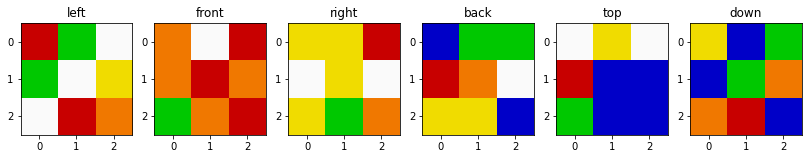

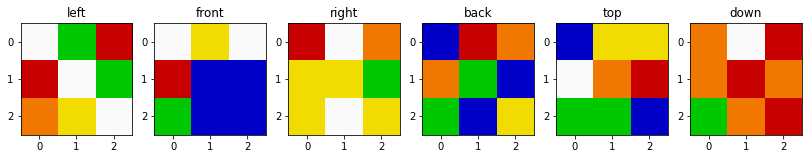

In [44]:
cube = CubikRubic3x3Engine(state=d)
cube.visualise()
cube._rotare_down()
cube.visualise()

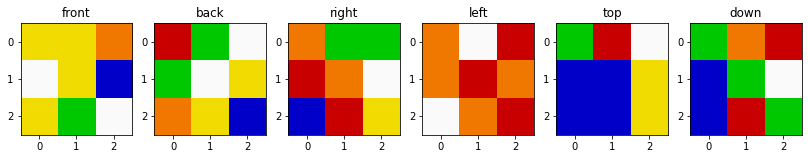

In [19]:
cube._right(True)._down(True)._right()._down()
cube.visualise()